# `VTKtools` Documentation

In [25]:
include("../src/VTKtools.jl")
vtk = VTKtools

using PyPlot
pygui(false);

## Geometric Manipulation

### Discretization

In [32]:
?vtk.discretize

`discretize(f, xlow, xhigh, n::Int64, r::Float64; central::Bool=false)`

Discretizes the continuous function `f` between the range `xlow` and `xhigh` into `n` intervals, with `r` the ratio between first and last interval if `central=false` or between first and central interval if `central=true`.

**Examples**

The following lines show the discretization of a semi-circumference perimeter   into 100 intervals of uniform length:

`julia     julia> f(x) = (x, sqrt(1-round(x,8)^2), 0)  # Semi-circunference of radius 1     julia> discretize(f, -1, 1, 100, 1.0)`


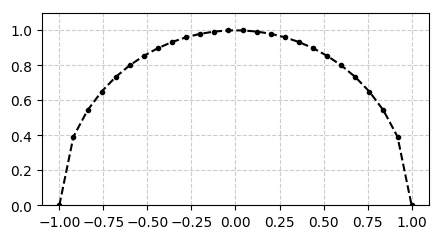

In [33]:
f(x) = (x, sqrt(1-round(x,8)^2), 0)

points = vtk.discretize(f, -1, 1, 25, 1.0)

function plot1(points)
    x = [p[1] for p in points]
    y = [p[2] for p in points]
    z = [p[3] for p in points]

    fig = figure("", figsize=(5,2.5))
    plot(x,y, "--.k")
    xlim([-1, 1]*1.1)
    ylim([0, 1]*1.1)
    grid(true, color="0.8", linestyle="--")
end

plot1(points)

However, parameterizing the curve as `f(x) = (x, sqrt(1-x^2), 0)`, the discretization was done evenly spaced in `x`. If we want to evenly space the path of the curve, we'd be better off parameterizing it as `f(theta) = (cos(theta), sin(theta), 0)`:

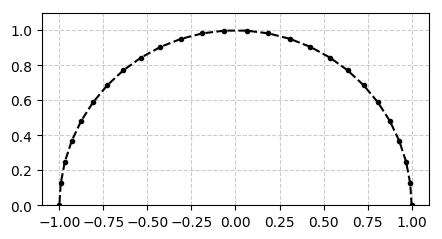

In [34]:
f(theta) = (cos(theta), sin(theta), 0)
points = vtk.discretize(f, 0, pi, 25, 1.0)
plot1(points)

That looks better. If now we want to increase the step size as we go along the curve (`r=1/8`):

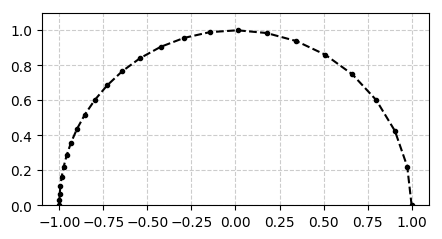

In [35]:
points = vtk.discretize(f, 0, pi, 25, 1/8)
plot1(points)

If we want to center that spacing we give `central=true`:

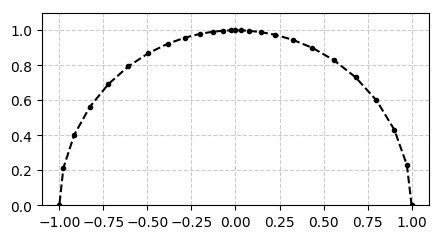

In [36]:
points = vtk.discretize(f, 0, pi, 25, 1/8; central=true)
plot1(points)

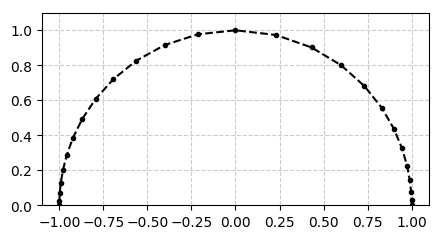

In [37]:
points = vtk.discretize(f, 0, pi, 25, 8.0; central=true)
plot1(points)

In order to define multiple sections of refinement, the function `multidiscretize` can be used:

In [38]:
?vtk.multidiscretize

`multidiscretize(f, xlow, xhigh, sections)`

Discretizes the continuous function `f` between the range `xlow` and `xhigh` into multiple sections of refinement as specified in `sections`.

** Arguments **

  * `f`         : Continuous function of the form `f(x)` to be discretized               between `xlow` and `xhigh`,
  * `xlow`      : Lower bound.
  * `xhigh`     : Upper bound.
  * `sections`  : Array `[sec1, sec2, ...]`specifying the               sections of discretization in the format               `sec = (c::Float64, n::Int64, r::Float64, central::Bool)`,               with `c` the normalized length of this section (the sum of all               c must equal one), `n` the number of intervals in this section               , `r` the increment ratio between first and last interval if               `central=false` or between first and central interval if               `central=true`.

**Examples**

The following lines show the discretization of a semi-circumference perimeter   into 90 intervals done in three sections of discretization:

`julia     julia> f(theta) = (cos(theta), sin(theta), 0)     julia> sec = (1/3, 30, 1/8, true)     julia> points = vtk.multidiscretize(f, 0, pi, [sec, sec, sec])`


Here we will discretize the semi-circle in three different sections of refinement:

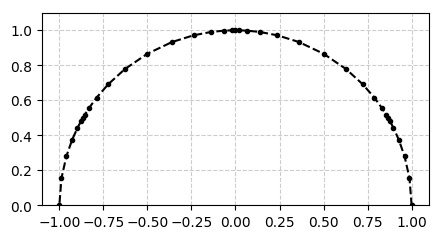

In [39]:
sec = (1/3, 12, 1/8, true)
points = vtk.multidiscretize(f, 0, pi, [sec, sec, sec])

plot1(points)

Let's verify that the are returned in the right order:

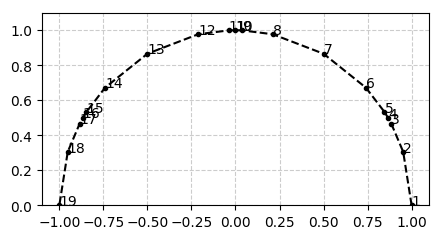

In [40]:
sec = (1/3, 6, 1/8, true)
points = vtk.multidiscretize(f, 0, pi, [sec, sec, sec])

plot1(points)

# Numbering
for (i,(x,y,z)) in enumerate(points)
    annotate("$i", xy=(x,y), xytext=(x,y))
end

### Meshing

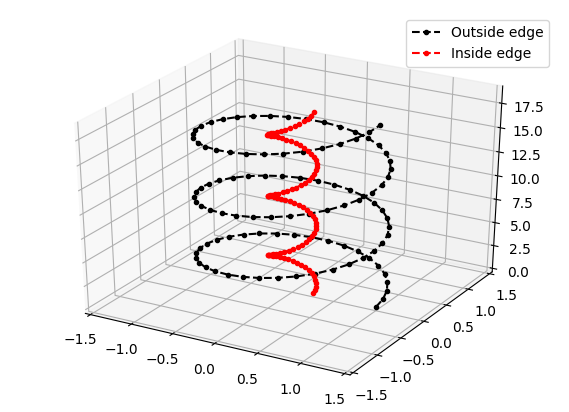

PyObject <matplotlib.legend.Legend object at 0x7ff7dbfaaf50>

In [28]:
# Helicoid function
rho,k = 1,1
f(z) = [rho*cos(k*z), rho*sin(k*z), z]

# Discretize
points1 = vtk.discretize(f, 0, 3*2*pi, 100, 1.0)
rho = rho/4
points2 = vtk.discretize(f, 0, 3*2*pi, 100, 1.0)

function plot2(points; label="", style="--.k")
    x = [p[1] for p in points]
    y = [p[2] for p in points]
    z = [p[3] for p in points]

    fig = figure("", figsize=(7,5))
    ax = gca(projection="3d")
    plot(x,y,z, style, label=label)
    xlim([-1, 1]*1.5)
    ylim([-1, 1]*1.5)
    if label!=""
        legend(loc="best")
    end
end

plot2(points1; label="Outside edge")
plot2(points2; label="Inside edge", style="--.r")